<a href="https://colab.research.google.com/github/Daarlens/ProBook/blob/main/%D0%91%D0%B8%D0%B1%D0%BB%D0%B8%D0%BE%D1%82%D0%B5%D0%BA%D0%B0_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Библиотека Seaborn

### Введение

**Seaborn** — это мощная и удобная библиотека для визуализации данных на языке Python, которая построена на основе Matplotlib. Она значительно упрощает создание сложных и информативных графиков, предоставляя высокоуровневый интерфейс для рисования различных типов графиков. В Seaborn встроено множество функций, предназначенных для статистической графики и анализа данных.

Эта лекция охватывает следующие темы:

1. Основы Seaborn и установка.
2. Структура данных, используемая в Seaborn.
3. Основные типы графиков и их использование.
4. Работа с палитрами и настройка стилей графиков.
5. Расширенные возможности Seaborn (сетки графиков, регрессионный анализ, парные графики).

### 1. Основы Seaborn и установка

Seaborn не является частью стандартной библиотеки Python, поэтому для его использования нужно установить пакет.

#### Установка Seaborn:
```bash
pip install seaborn
```

#### Импортирование Seaborn
```python
import seaborn as sns
import matplotlib.pyplot as plt
```
Seaborn тесно интегрирован с библиотекой Matplotlib, что позволяет вам использовать её для более тонкой настройки графиков.

### 2. Структура данных, используемая в Seaborn

Seaborn работает с табличными данными. Наиболее распространённым форматом является Pandas DataFrame. Он поддерживает работу с категорическими и числовыми переменными. Это даёт возможность легко строить графики, используя именованные переменные и основываясь на колонках DataFrame.

Пример данных:

Seaborn предоставляет несколько встроенных наборов данных. Например, данные `tips` содержат информацию о чаевых, которые были оставлены в ресторане.




In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
tips = sns.load_dataset("tips")
print(tips.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4




Эти данные содержат информацию о размере счета, чаевых, поле клиента, курении, дне недели, времени приёма пищи и количестве людей за столиком.

### 3. Основные типы графиков

Seaborn поддерживает широкий спектр визуализаций. Рассмотрим основные графики и их использование.

#### 3.1. Гистограммы и плотность распределения

Гистограммы полезны для отображения распределения числовых данных. Для этого используется функция `sns.histplot`.

##### Пример 1. Построение гистограммы:





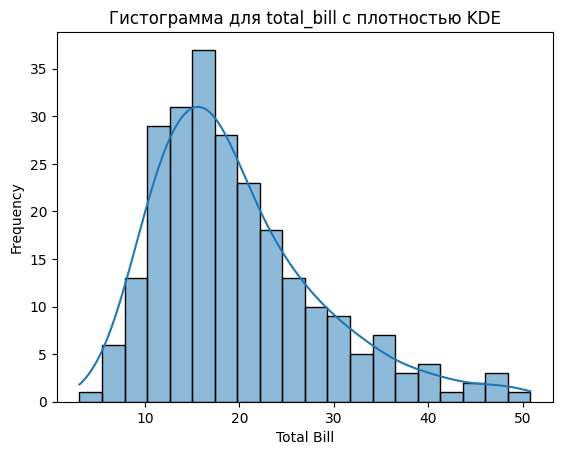

In [4]:
sns.histplot(tips['total_bill'], bins=20, kde=True)
plt.title('Гистограмма для total_bill с плотностью KDE')
plt.xlabel('Total Bill')
plt.ylabel('Frequency')
plt.show()

**Объяснение:**
- `total_bill` — это колонка с суммой чека.
- `bins=20` задаёт количество корзин (столбцов гистограммы).
- `kde=True` добавляет график плотности KDE.

#### 3.2. Диаграммы рассеяния (Scatterplot)

Диаграммы рассеяния позволяют визуализировать корреляцию между двумя переменными.

##### Пример 2. Построение scatterplot:





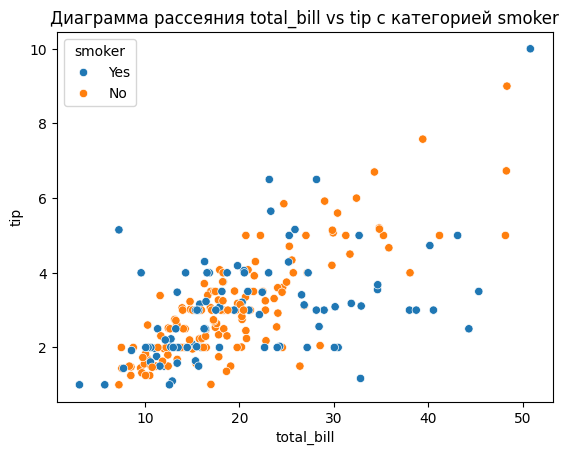

In [5]:
sns.scatterplot(x='total_bill', y='tip', data=tips, hue='smoker')
plt.title('Диаграмма рассеяния total_bill vs tip с категорией smoker')
plt.show()

**Объяснение:**
- `x` и `y` указывают переменные для осей.
- `hue='smoker'` разделяет точки по цветам в зависимости от того, курящий клиент или нет.

#### 3.3. Ящики с усами (Boxplot)

Boxplot показывает распределение данных через пять основных характеристик: минимум, первый квартиль, медиану, третий квартиль и максимум.

##### Пример 3. Построение boxplot:





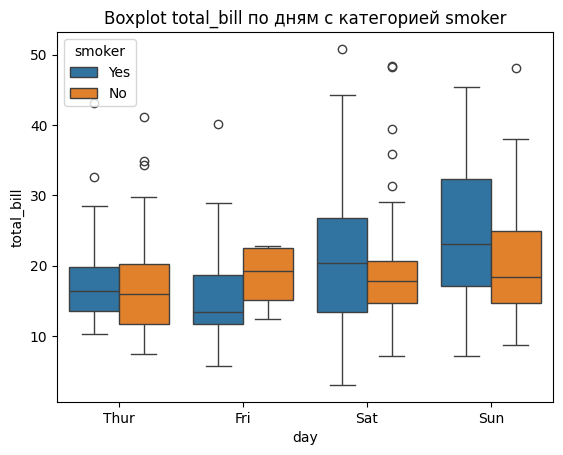

In [6]:
sns.boxplot(x='day', y='total_bill', data=tips, hue='smoker')
plt.title('Boxplot total_bill по дням с категорией smoker')
plt.show()

**Объяснение:**
- Boxplot позволяет сравнивать распределения счетов в разные дни недели, а также различать данные для курящих и некурящих клиентов.

#### 3.4. Violin plot

Violin plot комбинирует функции boxplot и графика плотности, показывая как распределение данных, так и ключевые статистические параметры.

##### Пример 4. Построение violin plot:




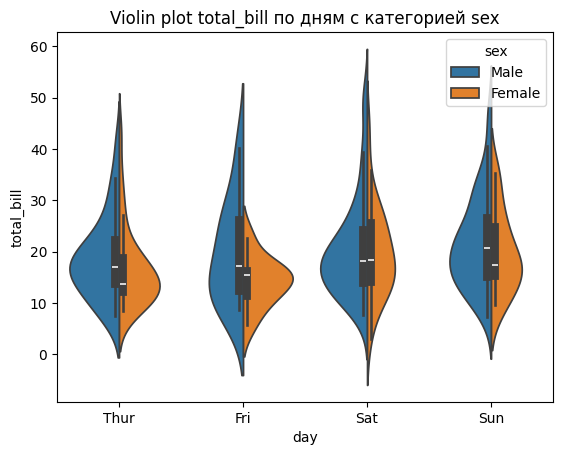

In [7]:
sns.violinplot(x='day', y='total_bill', data=tips, hue='sex', split=True)
plt.title('Violin plot total_bill по дням с категорией sex')
plt.show()


**Объяснение:**
- `hue='sex'` разделяет графики по полу клиентов.
- `split=True` объединяет графики для каждой категории.

#### 3.5. Heatmap (тепловая карта)

Тепловая карта отображает данные в виде матрицы, где каждая ячейка имеет цвет, соответствующий величине данных.

##### Пример 5. Построение тепловой карты корреляций:





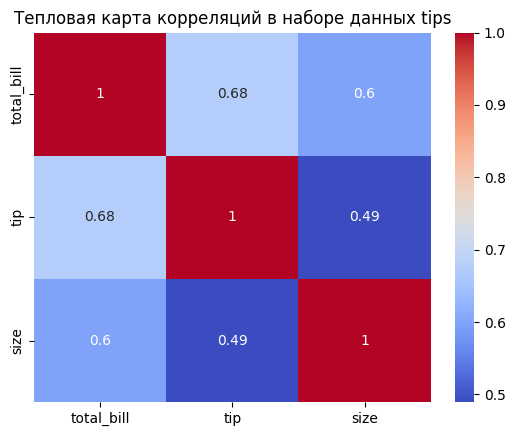

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка данных
tips = sns.load_dataset('tips')
# Удаление категориальных столбцов
tips_numeric = tips.select_dtypes(include=['float64', 'int64'])
# Вычисление корреляции
corr = tips_numeric.corr()
# Построение тепловой карты
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Тепловая карта корреляций в наборе данных tips')
plt.show()


**Объяснение:**
- `tips.corr()` вычисляет корреляцию между числовыми переменными.
- `annot=True` добавляет значения корреляций в ячейки.
- `cmap='coolwarm'` задает цветовую палитру для визуализации.

### 4. Работа с палитрами и настройка стилей графиков

#### 4.1. Установка стиля

Seaborn позволяет легко управлять внешним видом графиков с помощью функций настройки стилей.

##### Пример 6. Изменение стиля графика:




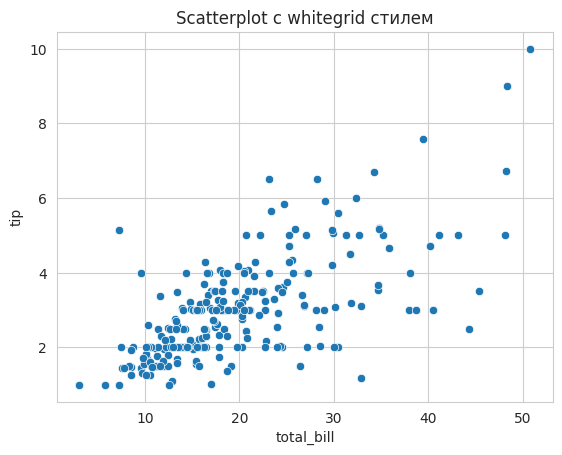

In [13]:
sns.set_style('whitegrid')
sns.scatterplot(x='total_bill', y='tip', data=tips)
plt.title('Scatterplot с whitegrid стилем')
plt.show()


**Объяснение:**
- `sns.set_style('whitegrid')` устанавливает стиль с белым фоном и сеткой.

#### 4.2. Цветовые палитры

Цвета играют важную роль в визуализации данных. Seaborn поддерживает различные палитры.

##### Пример 7. Применение палитры:




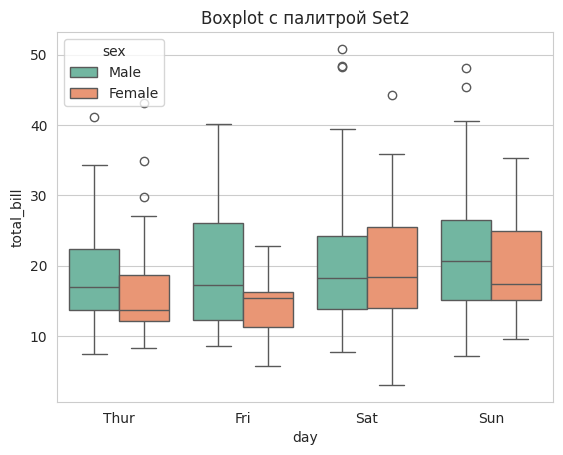

In [14]:
sns.set_palette('Set2')
sns.boxplot(x='day', y='total_bill', data=tips, hue='sex')
plt.title('Boxplot с палитрой Set2')
plt.show()


**Объяснение:**
- `sns.set_palette('Set2')` применяет палитру Set2, которая подходит для категориальных данных.

### 5. Расширенные возможности Seaborn

#### 5.1. Фасетные графики (FacetGrid)

FacetGrid позволяет разделять данные на подмножества и строить для каждого подмножества отдельный график.

##### Пример 8. Использование FacetGrid:





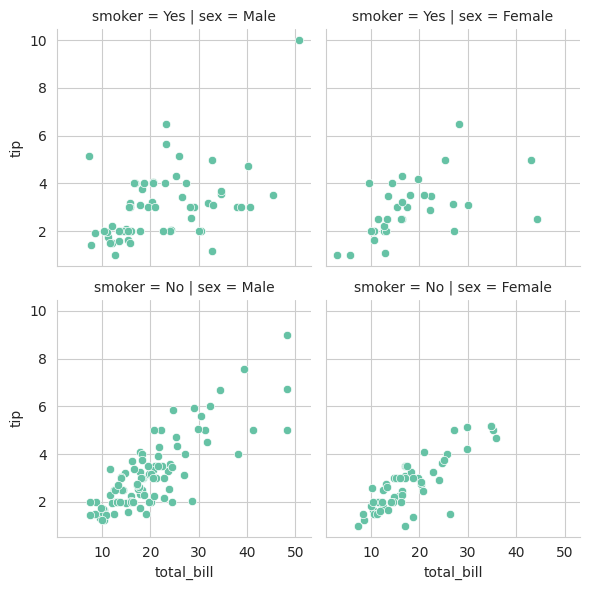

In [15]:
g = sns.FacetGrid(tips, col='sex', row='smoker')
g.map(sns.scatterplot, 'total_bill', 'tip')
plt.show()

**Объяснение:**
- `col='sex'` и `row='smoker'` создают сетку графиков, разбитую по полу и факту курения.
- `g.map()` применяется для построения scatterplot на каждой ячейке сетки.

#### 5.2. Парные графики (Pairplot)

Pairplot создаёт сетку диаграмм рассеяния для каждой пары числовых переменных, что полезно для анализа корреляций.

##### Пример 9. Использование Pairplot:




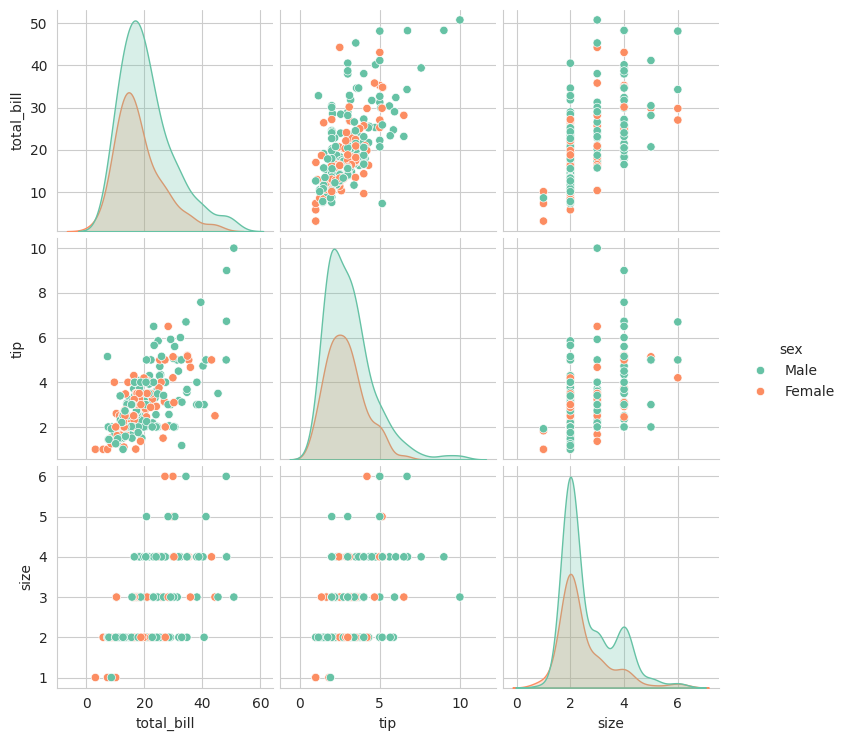

In [16]:
sns.pairplot(tips, hue='sex')
plt.show()


**Объяснение:**
- `hue='sex'` окрашивает точки на графиках в зависимости от пола.

#### 5.3. Регрессионные графики

Регрессионные графики добавляют линию регрессии на scatterplot, позволяя анализировать тренды.

##### Пример 10. Построение линейной регрессии:




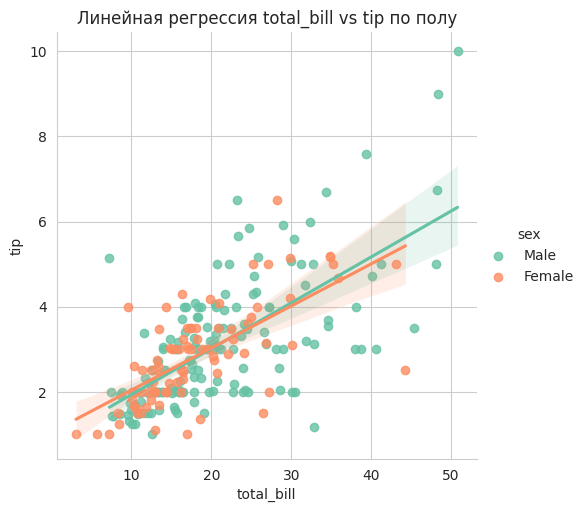

In [17]:
sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex')
plt.title('Линейная регрессия total_bill vs tip по полу')
plt.show()


**Объяснение:**
- `sns.lmplot()` строит линейную регрессию и добавляет доверительные интервалы.


### 6. Кастомизация графиков в Seaborn

Seaborn предоставляет множество возможностей для настройки графиков. Помимо выбора палитр и стилей, вы можете использовать расширенные параметры для детализации графиков и улучшения их внешнего вида.

#### 6.1. Добавление заголовков и меток осей
Графики часто нуждаются в хорошей аннотации, чтобы они были понятными.

##### Пример 11. Добавление заголовка и меток осей:





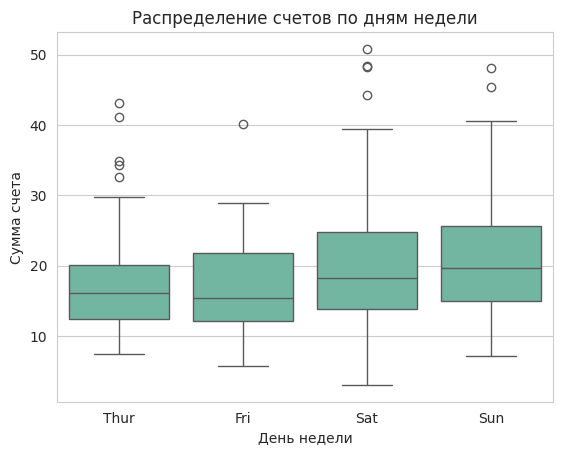

In [18]:
sns.set_style('whitegrid')
ax = sns.boxplot(x='day', y='total_bill', data=tips)
ax.set_title('Распределение счетов по дням недели')
ax.set_xlabel('День недели')
ax.set_ylabel('Сумма счета')
plt.show()

**Объяснение:**
- `ax.set_title()`, `ax.set_xlabel()` и `ax.set_ylabel()` — это методы для добавления заголовков и подписей осей.

#### 6.2. Настройка легенды
Легенда помогает понять, что обозначают различные элементы графика. Seaborn автоматически создаёт легенды, но их можно настроить вручную.

##### Пример 12. Настройка позиции и заголовка легенды:





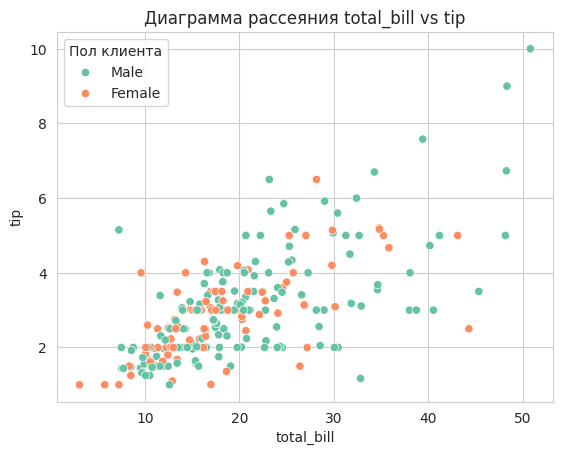

In [19]:
sns.scatterplot(x='total_bill', y='tip', data=tips, hue='sex')
plt.legend(title='Пол клиента', loc='upper left')
plt.title('Диаграмма рассеяния total_bill vs tip')
plt.show()

**Объяснение:**
- `plt.legend(title='Пол клиента', loc='upper left')` добавляет легенду с указанным заголовком и изменяет её положение.

#### 6.3. Настройка размеров графиков
Размеры графиков играют важную роль в восприятии данных.

##### Пример 13. Изменение размеров графиков:





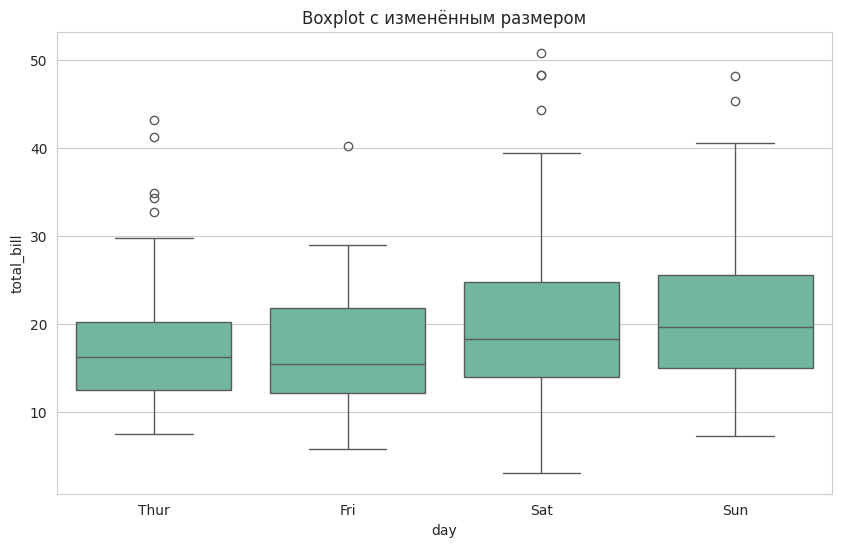

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='day', y='total_bill', data=tips)
plt.title('Boxplot с изменённым размером')
plt.show()

**Объяснение:**
- `plt.figure(figsize=(10, 6))` изменяет размер графика, делая его шире или выше.

#### 6.4. Подписи на точках
Если нужно пометить конкретные точки на графике, это можно сделать с помощью `annotate()` или `text()`.

##### Пример 14. Подписи на scatterplot:





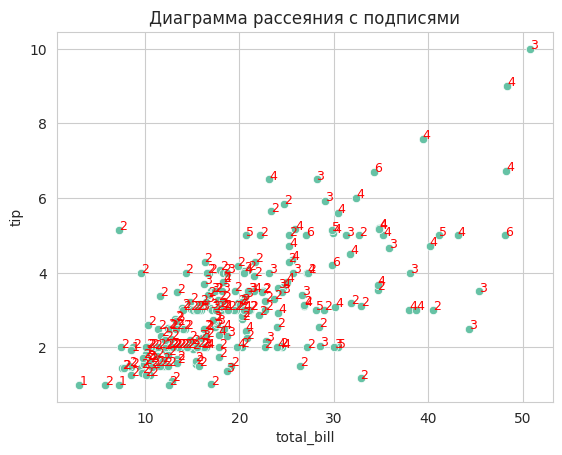

In [21]:
ax = sns.scatterplot(x='total_bill', y='tip', data=tips)
for i, txt in enumerate(tips['size']):
    ax.text(tips['total_bill'][i], tips['tip'][i], txt, fontsize=9, color='red')
plt.title('Диаграмма рассеяния с подписями')
plt.show()

**Объяснение:**
- `ax.text()` добавляет текстовые подписи к каждому элементу диаграммы.

### 7. Анализ категориальных данных

Категориальные данные требуют особого подхода к визуализации, и Seaborn предоставляет несколько специализированных графиков.

#### 7.1. Countplot (график частот)

Countplot отображает количество наблюдений в каждой категории.

##### Пример 15. Построение countplot:





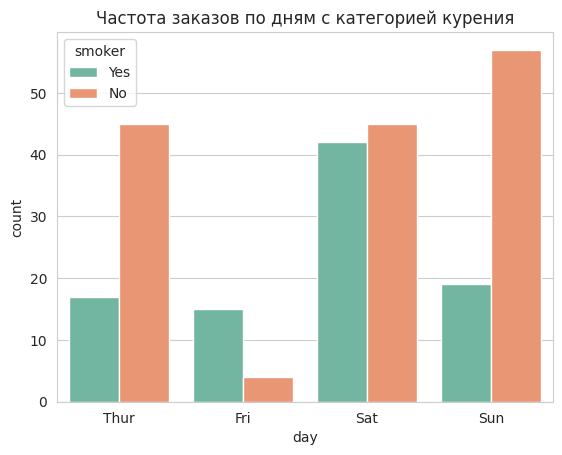

In [22]:
sns.countplot(x='day', data=tips, hue='smoker')
plt.title('Частота заказов по дням с категорией курения')
plt.show()

**Объяснение:**
- `sns.countplot()` отображает количество записей для каждого дня, разделяя данные по категории курящих/некурящих.

#### 7.2. Barplot (столбиковая диаграмма)

Barplot используется для отображения средней величины по категориям с указанием доверительных интервалов.

##### Пример 16. Построение barplot:





<ipython-input-23-2dfeacdb81b8>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='day', y='total_bill', data=tips, hue='sex', ci='sd')


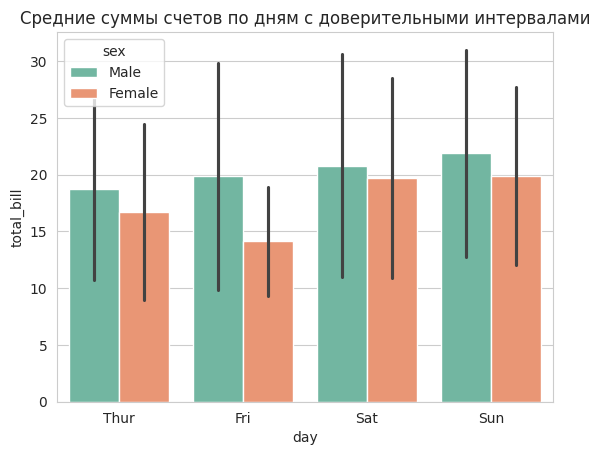

In [23]:
sns.barplot(x='day', y='total_bill', data=tips, hue='sex', ci='sd')
plt.title('Средние суммы счетов по дням с доверительными интервалами')
plt.show()

**Объяснение:**
- `ci='sd'` отображает доверительные интервалы в виде стандартного отклонения для каждой категории.

#### 7.3. Pointplot (точечная диаграмма)

Pointplot отображает средние значения с доверительными интервалами, но вместо столбиков использует точки и линии, что удобно для анализа тенденций.

##### Пример 17. Построение pointplot:





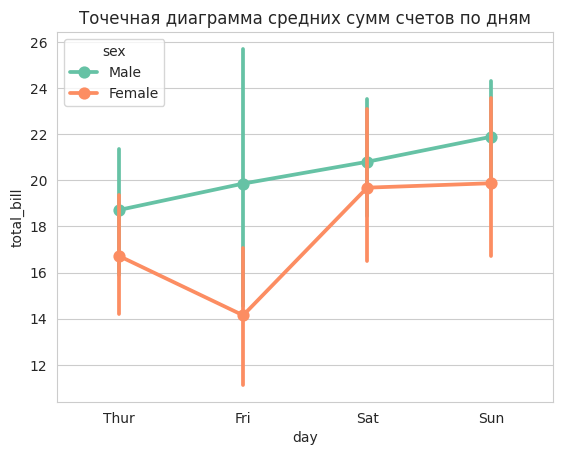

In [24]:
sns.pointplot(x='day', y='total_bill', data=tips, hue='sex')
plt.title('Точечная диаграмма средних сумм счетов по дням')
plt.show()

**Объяснение:**
- Pointplot помогает визуализировать тенденции для средних значений и сравнивать категории.

### 8. Взаимодействие с Matplotlib

Seaborn построен на Matplotlib, и многие возможности этой библиотеки можно использовать для настройки графиков Seaborn.

#### 8.1. Добавление дополнительных элементов на график

Seaborn позволяет добавлять другие графические элементы с использованием функций Matplotlib.

##### Пример 18. Добавление горизонтальных и вертикальных линий:




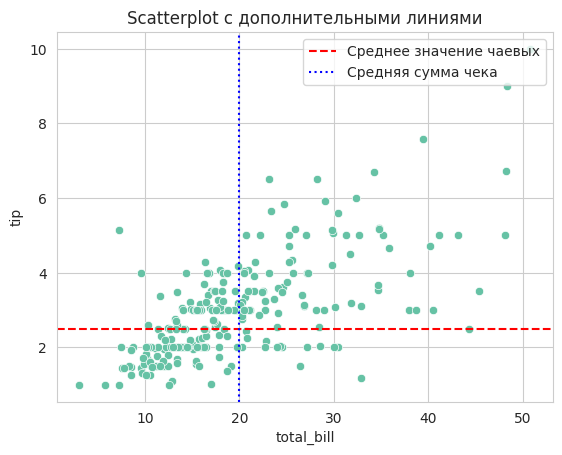

In [25]:
ax = sns.scatterplot(x='total_bill', y='tip', data=tips)
plt.axhline(y=2.5, color='red', linestyle='--', label='Среднее значение чаевых')
plt.axvline(x=20, color='blue', linestyle=':', label='Средняя сумма чека')
plt.legend()
plt.title('Scatterplot с дополнительными линиями')
plt.show()


**Объяснение:**
- `plt.axhline()` и `plt.axvline()` добавляют горизонтальные и вертикальные линии на график.

#### 8.2. Совмещение нескольких графиков

Можно комбинировать несколько графиков на одном холсте, используя функции Matplotlib.

##### Пример 19. Комбинирование графиков:




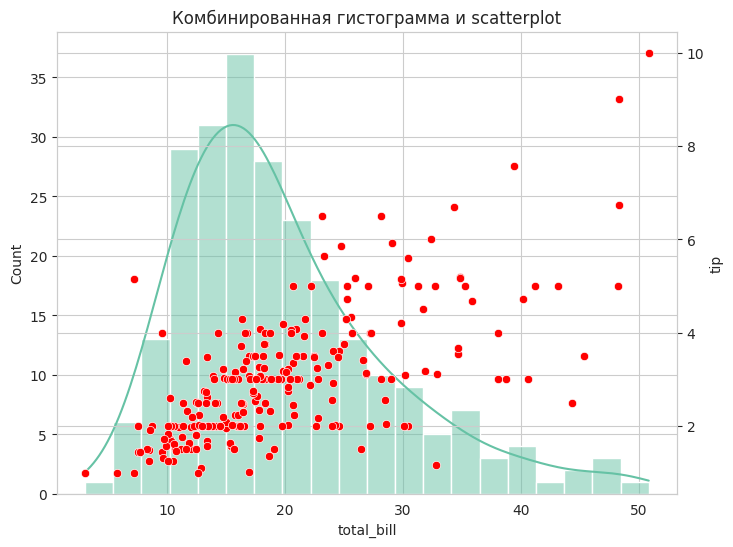

In [26]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(tips['total_bill'], bins=20, kde=True, ax=ax)
ax2 = ax.twinx()
sns.scatterplot(x='total_bill', y='tip', data=tips, ax=ax2, color='r')
plt.title('Комбинированная гистограмма и scatterplot')
plt.show()


**Объяснение:**
- `twinx()` создаёт вторую ось y, что позволяет разместить два разных графика на одном холсте.

### 9. Расширенные возможности для анализа данных

Seaborn также предоставляет инструменты для более продвинутого анализа данных и визуализации.

#### 9.1. Jointplot

Jointplot комбинирует диаграмму рассеяния с гистограммами и плотностями распределения.

##### Пример 20. Построение jointplot:





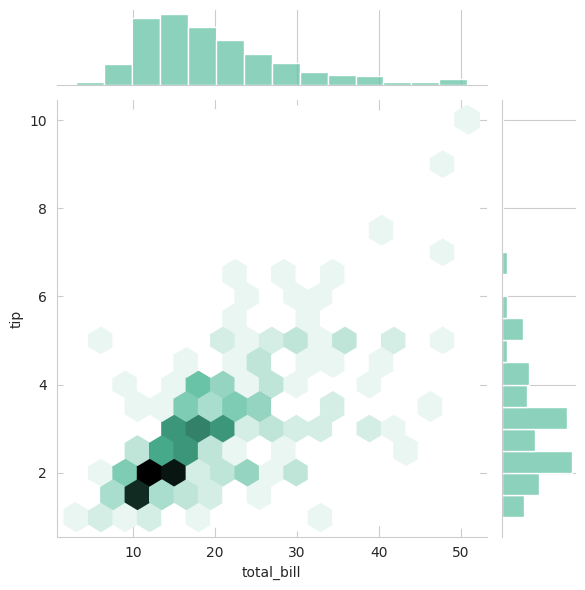

In [27]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='hex')

**Объяснение:**
- Jointplot показывает диаграмму рассеяния в центре с гистограммами распределения по осям.
- `kind='hex'` создаёт шестигранную диаграмму плотности.

#### 9.2. PairGrid

PairGrid похож на Pairplot, но позволяет более гибко управлять построением графиков для каждой комбинации переменных.

##### Пример 21. Использование PairGrid:




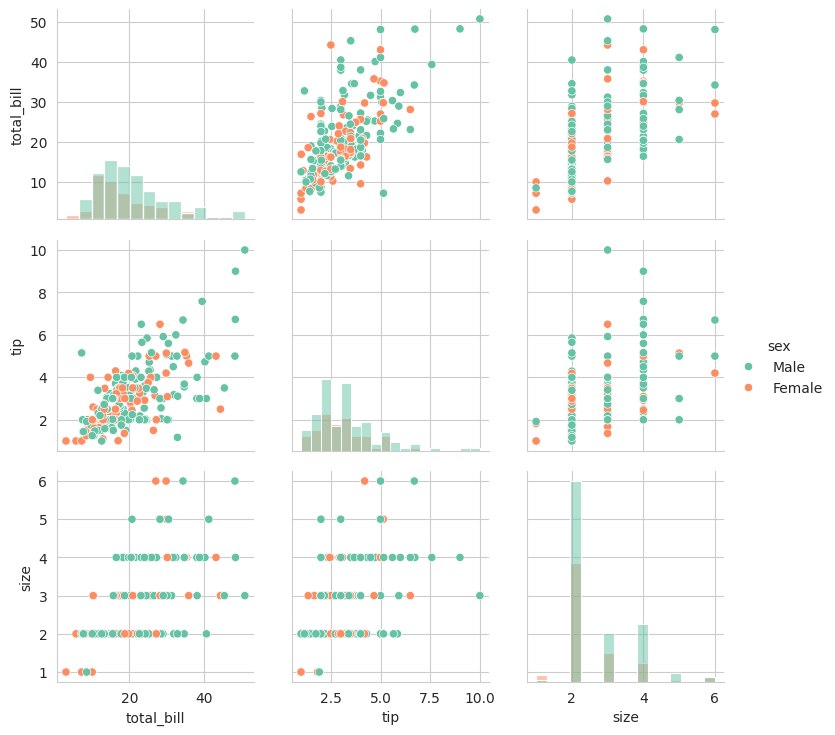

In [28]:
g = sns.PairGrid(tips, hue='sex')
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()
plt.show()


**Объяснение:**
- `map_diag()` определяет графики для диагональных элементов сетки, а `map_offdiag()` — для остальных.

### 10. Тематизация графиков

Seaborn позволяет изменять стили графиков в зависимости от целей и предпочтений.

#### 10.1. Использование темы "dark"

Seaborn предлагает несколько предостановленных тем, таких как `dark`, `white`, `ticks`, которые меняют общий вид графиков.

##### Пример 22. Применение темы:





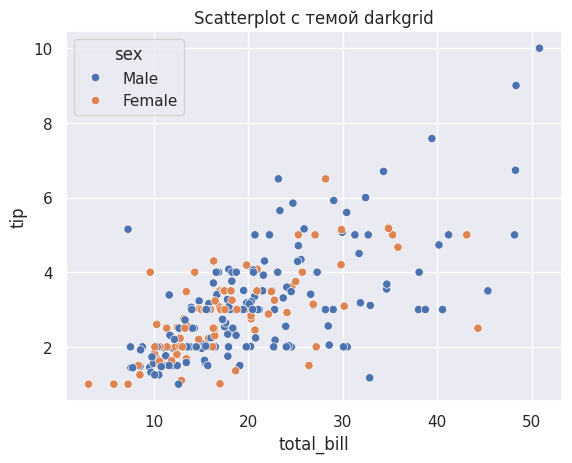

In [29]:
sns.set_theme(style='darkgrid')
sns.scatterplot(x='total_bill', y='tip', data=tips, hue='sex')
plt.title('Scatterplot с темой darkgrid')
plt.show()

**Объяснение:**
- `sns.set_theme(style='darkgrid')` изменяет стиль графика на "темный", добавляя сетку.


# 1. Основы работы с временными рядами в Seaborn

Работа с временными рядами — это важная часть анализа данных, особенно когда речь идёт о данных, которые меняются с течением времени (например, финансовые рынки, погодные данные, медицинские показания и т.д.). Хотя Seaborn не предоставляет специализированных инструментов для работы с временными рядами, он хорошо справляется с базовыми задачами их визуализации. В основном, временные ряды визуализируются с помощью линейных графиков и других диаграмм, которые можно использовать для отображения изменений во времени.

В этой части лекции мы рассмотрим:

1. Основы работы с временными рядами в Seaborn.
2. Построение линейных графиков для временных рядов.
3. Работа с временными интервалами и частотой данных.
4. Анализ сезонности и трендов.
5. Построение тепловых карт для временных данных.
6. Использование Matplotlib для более сложной визуализации временных данных.



Для работы с временными рядами данные обычно хранятся в формате `Pandas DataFrame`, где одна из колонок представляет временную метку, а остальные — соответствующие значения. Если временная метка уже преобразована в формат `datetime`, то Seaborn может непосредственно строить графики с этой колонкой.

#### Пример данных:
Рассмотрим данные о погоде, где в колонке `date` хранится дата, а в колонке `temperature` — температура:







In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Пример данных
data = {
    'date': pd.date_range(start='2023-01-01', periods=100, freq='D'),
    'temperature': pd.Series([20 + 5 * i for i in range(100)]) + pd.Series([5, -3, 7, 2, -5, 4, 6] * 14)
}
df = pd.DataFrame(data)

print(df.head())

        date  temperature
0 2023-01-01         25.0
1 2023-01-02         22.0
2 2023-01-03         37.0
3 2023-01-04         37.0
4 2023-01-05         35.0



### 2. Построение линейных графиков для временных рядов

Для отображения временных данных обычно используют **линейные графики**, где по оси X располагается время, а по оси Y — значения.

#### Пример 1. Построение простого линейного графика:





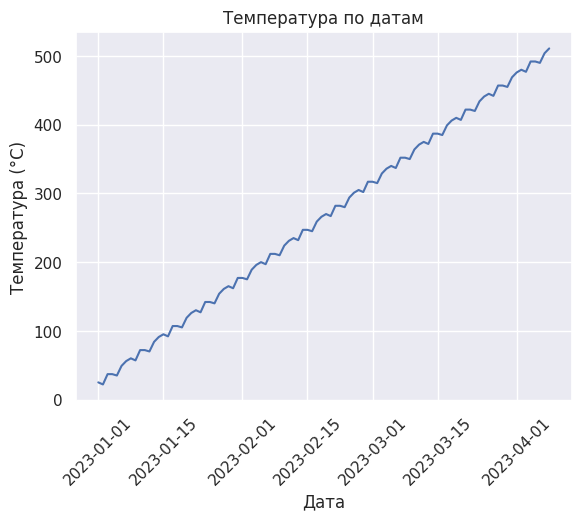

In [31]:
sns.lineplot(x='date', y='temperature', data=df)
plt.title('Температура по датам')
plt.xlabel('Дата')
plt.ylabel('Температура (°C)')
plt.xticks(rotation=45)
plt.show()


**Объяснение:**
- `sns.lineplot()` строит линейный график, где `x` — это даты, а `y` — значения температуры.
- `plt.xticks(rotation=45)` поворачивает метки на оси X для улучшения читабельности, что часто необходимо при работе с временными рядами.

### 3. Работа с временными интервалами и частотой данных

Временные ряды могут иметь разную частоту: данные могут быть собраны ежедневно, еженедельно, ежемесячно и т.д. Важно уметь работать с разными частотами и агрегировать данные по нужным временным интервалам.

#### Пример 2. Агрегация данных по неделям:




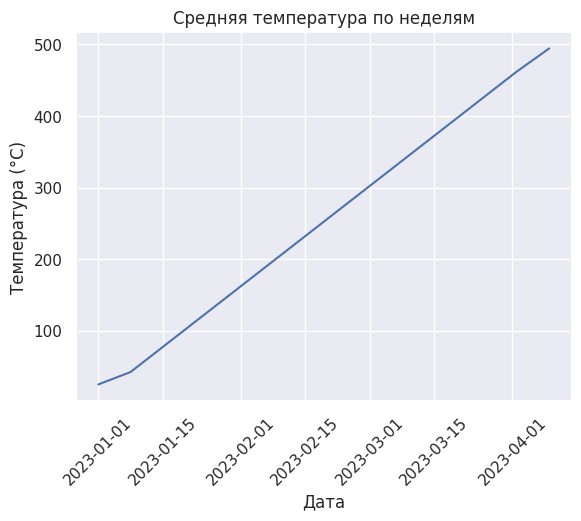

In [32]:

df_weekly = df.resample('W', on='date').mean()

sns.lineplot(x='date', y='temperature', data=df_weekly)
plt.title('Средняя температура по неделям')
plt.xlabel('Дата')
plt.ylabel('Температура (°C)')
plt.xticks(rotation=45)
plt.show()


**Объяснение:**
- `df.resample('W', on='date').mean()` аггрегирует данные по неделям (`'W'` обозначает недельный интервал) и вычисляет среднее значение температуры за каждую неделю.
- Этот метод удобен, если у вас очень много данных, и их нужно сгруппировать для анализа трендов на более крупном временном интервале.

### 4. Анализ сезонности и трендов

Для временных рядов важно выявлять сезонные колебания и долгосрочные тренды. Один из способов сделать это — сгладить данные, используя средние скользящие окна.

#### Пример 3. Сглаживание данных с помощью скользящего среднего:





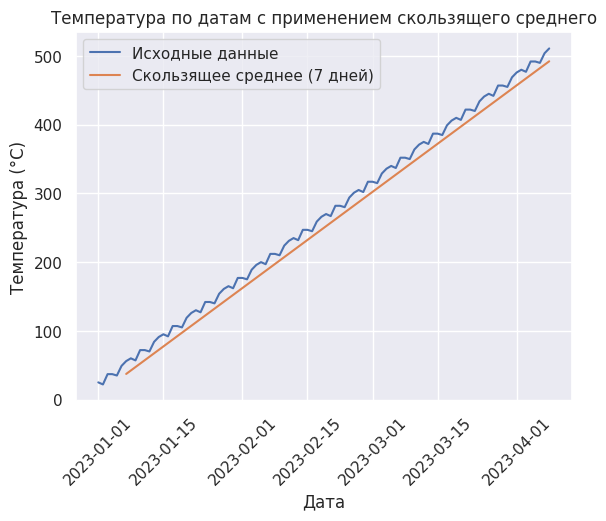

In [33]:
df['temperature_rolling'] = df['temperature'].rolling(window=7).mean()

sns.lineplot(x='date', y='temperature', data=df, label='Исходные данные')
sns.lineplot(x='date', y='temperature_rolling', data=df, label='Скользящее среднее (7 дней)')
plt.title('Температура по датам с применением скользящего среднего')
plt.xlabel('Дата')
plt.ylabel('Температура (°C)')
plt.xticks(rotation=45)
plt.legend()
plt.show()


**Объяснение:**
- `df['temperature'].rolling(window=7).mean()` рассчитывает среднее значение температуры за каждое скользящее окно длиной 7 дней.
- Этот метод полезен для выявления трендов и сглаживания случайных колебаний в данных.

### 5. Построение тепловых карт для временных данных

Тепловые карты — это полезный инструмент для визуализации временных данных, особенно когда нужно отобразить данные в двухмерной сетке по времени (например, температура по дням недели и часам).

#### Пример 4. Тепловая карта температуры по месяцам и дням:
Создадим искусственные данные для отображения температуры по месяцам и дням:






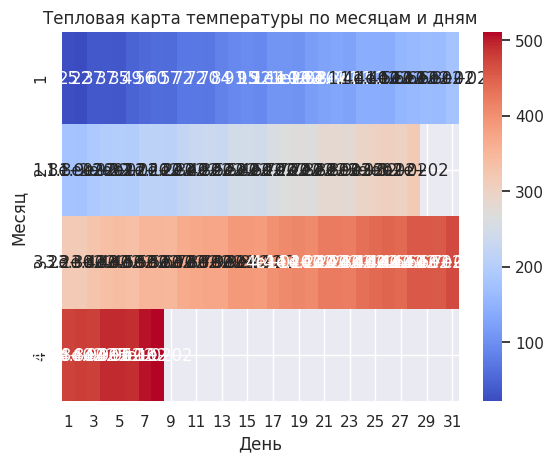

In [34]:
import numpy as np

# Создание данных
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

# Создание сводной таблицы для тепловой карты
pivot = df.pivot_table(values='temperature', index='month', columns='day')

# Построение тепловой карты
sns.heatmap(pivot, cmap='coolwarm', annot=True)
plt.title('Тепловая карта температуры по месяцам и дням')
plt.xlabel('День')
plt.ylabel('Месяц')
plt.show()


**Объяснение:**
- `df.pivot_table()` создаёт сводную таблицу, где строки — это месяцы, столбцы — дни, а значения — средняя температура.
- `sns.heatmap()` рисует тепловую карту с цветовой палитрой `coolwarm`, показывая различия в температуре по месяцам и дням.

### 6. Использование Matplotlib для более сложной визуализации временных данных

Matplotlib предоставляет более широкие возможности для работы с временными данными. Например, можно создавать графики с дополнительными осями или многосерийные графики.

#### Пример 5. Многосерийный график (построение нескольких временных рядов):
Представим, что у нас есть данные о температуре в двух разных городах.








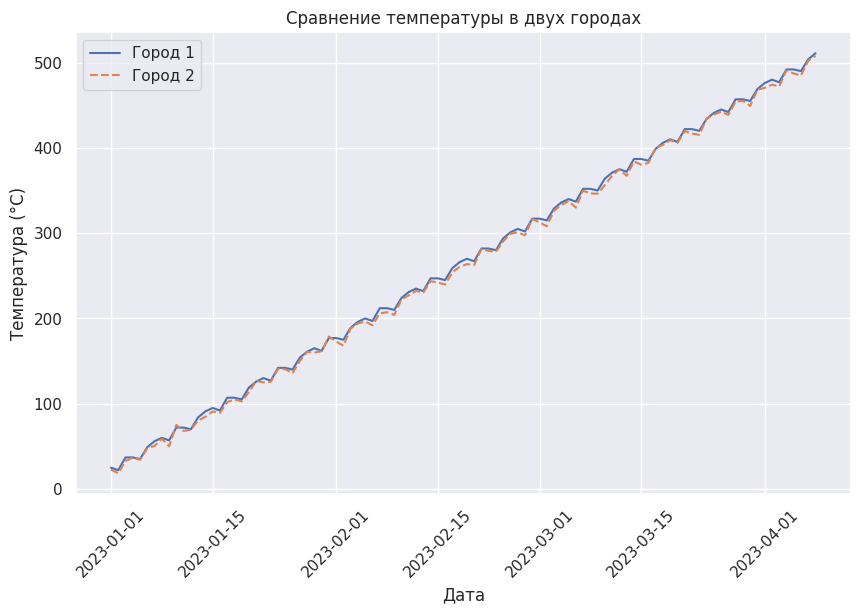

In [36]:
# Создание данных для второго города
df['temperature_city2'] = df['temperature'] - np.random.normal(3, 2, len(df))
# Построение многосерийного графика
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='temperature', data=df, label='Город 1')
sns.lineplot(x='date', y='temperature_city2', data=df, label='Город 2', linestyle='--')
plt.title('Сравнение температуры в двух городах')
plt.xlabel('Дата')
plt.ylabel('Температура (°C)')
plt.xticks(rotation=45)
plt.legend()
plt.show()

**Объяснение:**
- Данные для второго города генерируются случайным образом с некоторым смещением от первого города.
- `sns.lineplot()` используется для отображения двух временных рядов на одном графике с различными стилями линий.




## Вопросы для самопроверки


1. Что такое библиотека Seaborn и для чего она используется?
2. Как установить Seaborn с помощью pip?
3. Как загрузить встроенный набор данных `tips` в Seaborn?
4. Какие основные типы графиков можно построить с помощью Seaborn?
5. Как создать гистограмму для переменной `total_bill` из набора данных `tips`?
6. В чем отличие между `scatterplot` и `lineplot`?
7. Как использовать цветовую кодировку в графиках Seaborn?
8. Что такое FacetGrid и как его использовать?
9. Как построить boxplot для анализа распределения переменной по категориям?
10. Как добавить линейную регрессию на график scatterplot?
11. Как настроить стиль графика в Seaborn?
12. Что такое violin plot и когда его следует использовать?
13. Как создать тепловую карту для корреляций между переменными?
14. Как сохранить график в файл с помощью Seaborn?
15. Какие палитры цветов доступны в Seaborn и как их применить?
16. Как добавить подписи к графикам и изменить размеры осей?
17. Как объединить несколько графиков в один с помощью Seaborn?
18. Как визуализировать временные ряды с помощью Seaborn?
19. В чем разница между `distplot` и `kdeplot`?
20. Как использовать `pairplot` для анализа взаимосвязей между несколькими переменными?



## Задачи для самостоятельной работы


1. **Установить Seaborn**: Установите библиотеку Seaborn с помощью `pip` и импортируйте её в вашем проекте.

2. **Загрузить данные**: Загружайте встроенный набор данных `tips` и выведите первые 10 строк.



In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

tips= sns.load_dataset("tips")
print(tips.head(10))

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
5       25.29  4.71    Male     No  Sun  Dinner     4
6        8.77  2.00    Male     No  Sun  Dinner     2
7       26.88  3.12    Male     No  Sun  Dinner     4
8       15.04  1.96    Male     No  Sun  Dinner     2
9       14.78  3.23    Male     No  Sun  Dinner     2


3. **Построить гистограмму**: Постройте гистограмму для переменной `total_bill` из набора данных `tips`.



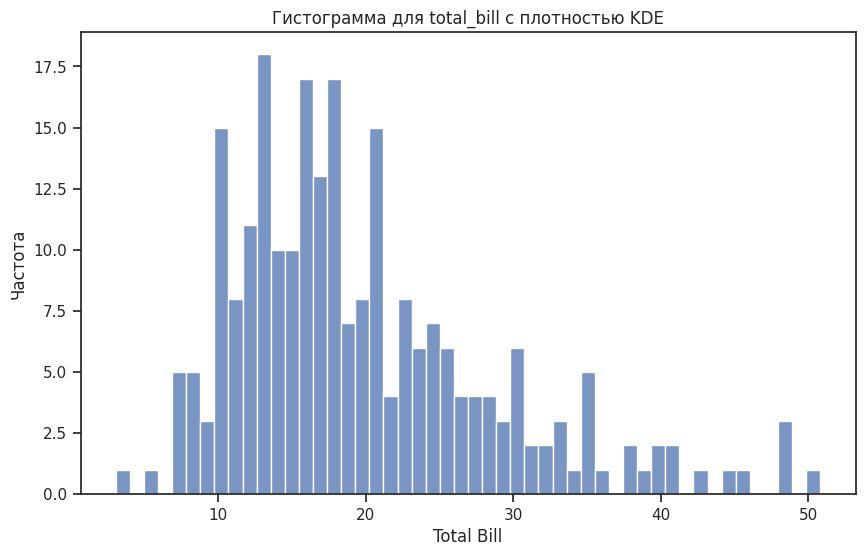

In [52]:
plt.figure(figsize=(10,6))
#kde=True - добавляю прямую плотности
sns.histplot(tips['total_bill'], bins=50, kde=False)
plt.title('Гистограмма для total_bill с плотностью KDE')
plt.xlabel('Total Bill')
plt.ylabel('Частота')
plt.show()

4. **Создать диаграмму рассеяния**: Постройте диаграмму рассеяния для `total_bill` и `tip`, используя цветовую кодировку по переменной `smoker`.




<function matplotlib.pyplot.show(close=None, block=None)>

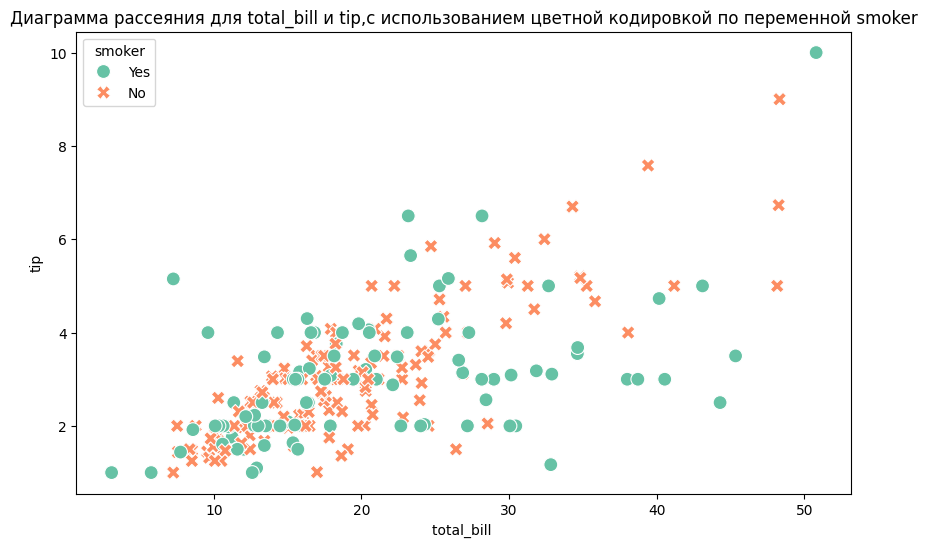

In [13]:
plt.figure (figsize= (10,6))
#palette - задаю цветовую палитру
#s - размер маркеров
#style - добавление различных маркеров
sns.scatterplot(data= tips, x= 'total_bill', y='tip',hue='smoker', style='smoker', palette='Set2',s=100)
plt.title('Диаграмма рассеяния для total_bill и tip,с использованием цветной кодировкой по переменной smoker')
plt.xlabel('total_bill ')
plt.ylabel('tip')
plt.legend(title= 'smoker')
plt.show


5. **Построить boxplot**: Создайте boxplot для переменной `total_bill` по дням недели с разделением по переменной `smoker`.



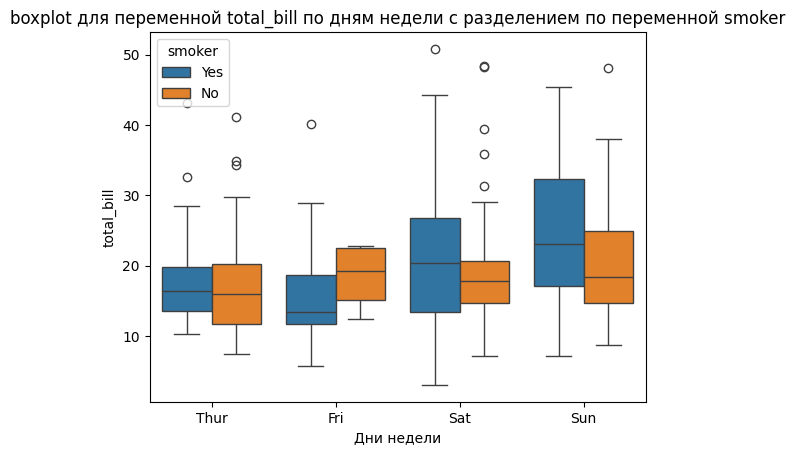

In [15]:
sns.boxplot(data= tips,x='day', y='total_bill',hue='smoker')
plt.title('boxplot для переменной total_bill по дням недели с разделением по переменной smoker')
plt.xlabel('Дни недели')
plt.ylabel('total_bill')
plt.show()

6. **Создать violin plot**: Постройте violin plot для `total_bill` по дням недели с разделением по переменной `sex`.



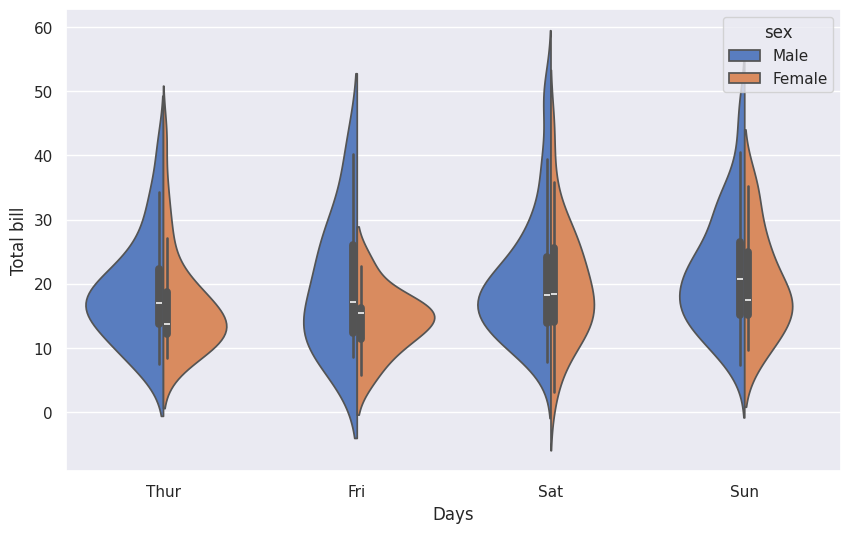

In [32]:
plt.figure(figsize=(10,6))
sns.violinplot(data=tips, x='day', y='total_bill', hue='sex', split=True, palette='muted')
plt.xlabel('Days')
plt.ylabel('Total bill')
plt.show()

7. **Построить тепловую карту**: Создайте тепловую карту корреляций для набора данных `tips`.



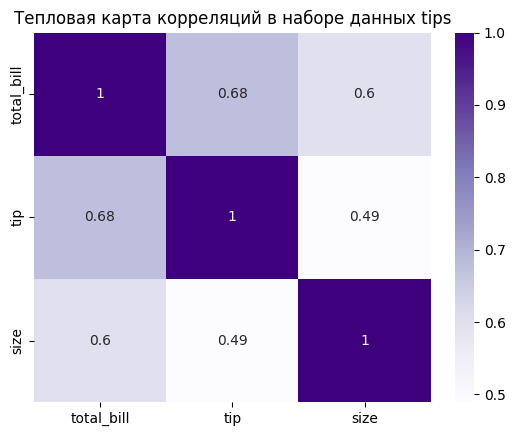

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка данных
tips = sns.load_dataset('tips')
# Удаление категориальных столбцов
tips_numeric = tips.select_dtypes(include=['float64', 'int64'])
# Вычисление корреляции
corr = tips_numeric.corr()
# Построение тепловой карты
sns.heatmap(corr, annot=True, cmap='Purples')
plt.title('Тепловая карта корреляций в наборе данных tips')
plt.show()


8. **Изменить стиль графика**: Установите стиль графика на `darkgrid` и постройте scatterplot для `total_bill` и `tip`.



Text(0, 0.5, 'total_bill')

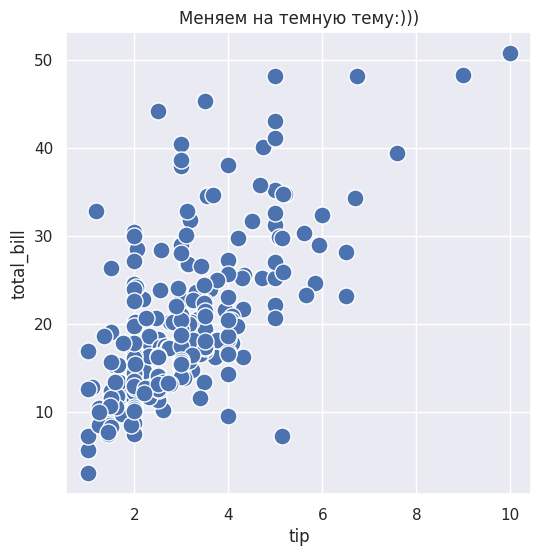

In [31]:
plt.figure(figsize=(6,6))
sns.set_theme(style='darkgrid')
sns.scatterplot(data=tips, x='tip', y='total_bill', s=150)
plt.title('Меняем на темную тему:)))')
plt.xlabel('tip')
plt.ylabel('total_bill')

9. **Применить цветовую палитру**: Используйте палитру `Set1` и постройте barplot для средней суммы счета по дням недели.



<ipython-input-34-71478013874f>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  srednaya_totall_bill= tips.groupby('day')['total_bill'].mean().reset_index()
<ipython-input-34-71478013874f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=srednaya_totall_bill,x='day',y='total_bill',palette='Set1')


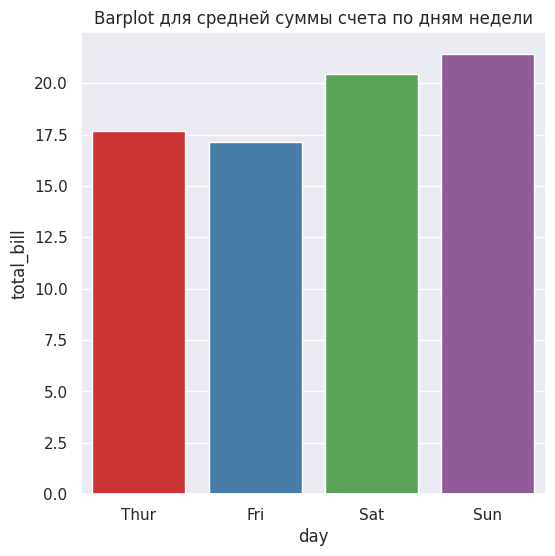

In [34]:
srednaya_totall_bill= tips.groupby('day')['total_bill'].mean().reset_index()
plt.figure(figsize=(6,6))
sns.barplot(data=srednaya_totall_bill,x='day',y='total_bill',palette='Set1')
plt.title('Barplot для средней суммы счета по дням недели')
plt.xlabel('day')
plt.ylabel('total_bill')
plt.show()

10. **Использовать FacetGrid**: Создайте FacetGrid для построения scatterplot для `total_bill` и `tip`, разделяя по переменной `sex`.



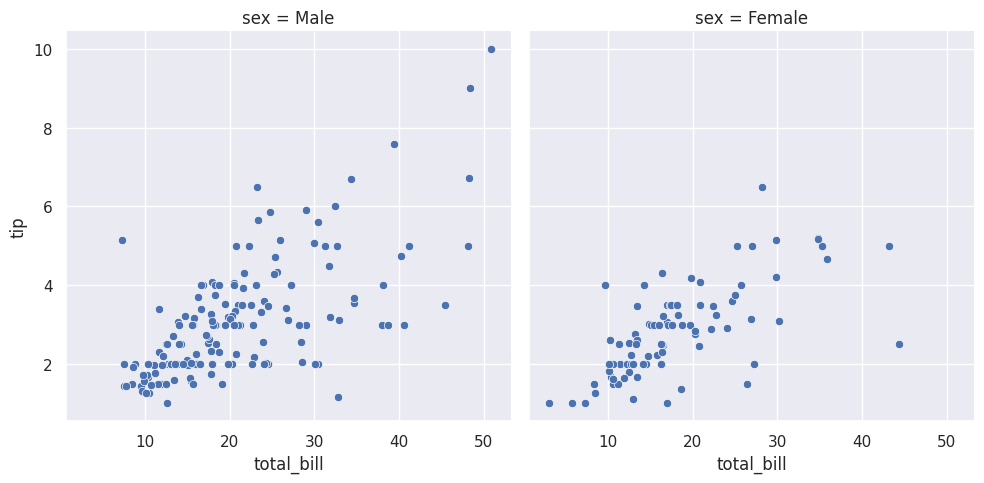

In [37]:
#height-задаем высоту графику
#aspect - определение соотношений сторон подграфиков
m=sns.FacetGrid(tips, col='sex',height= 5, aspect=1)
m.map(sns.scatterplot,'total_bill', 'tip')
plt.show()

11. **Построить pairplot**: Создайте pairplot для набора данных `tips`, используя цветовую кодировку по переменной `sex`.



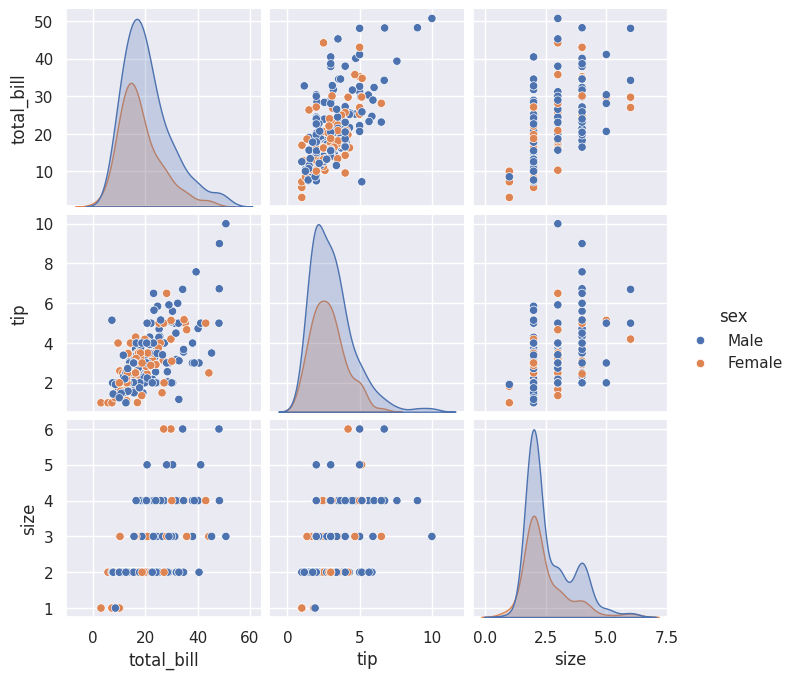

In [48]:
sns.set_theme(style='darkgrid') #ticks/ white/ darkgrid
sns.pairplot(tips,hue='sex',height=2.3, aspect=1)
plt.show()

12. **Добавить линейную регрессию**: Постройте линейную регрессию для `total_bill` и `tip`, разделяя по переменной `sex`.



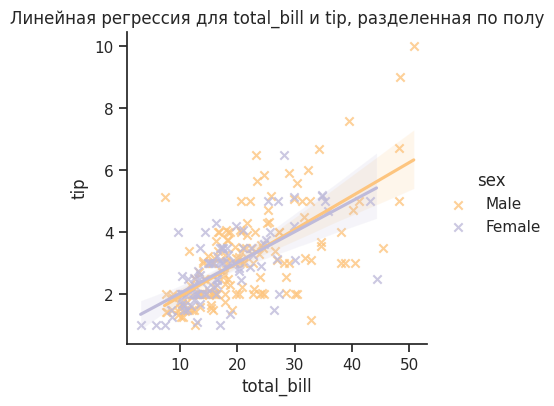

In [51]:
sns.set_theme(style='ticks') #ticks/ white/ darkgrid
sns.lmplot(data=tips, x='total_bill', y= 'tip', hue='sex',height=4, aspect=1, markers='x',palette= 'PuOr')
plt.title('Линейная регрессия для total_bill и tip, разделенная по полу')
plt.xlabel('total_bill')
plt.ylabel('tip')
plt.show()


13. **Построить гистограмму с KDE**: Постройте гистограмму для `total_bill` с наложенной плотностью KDE.



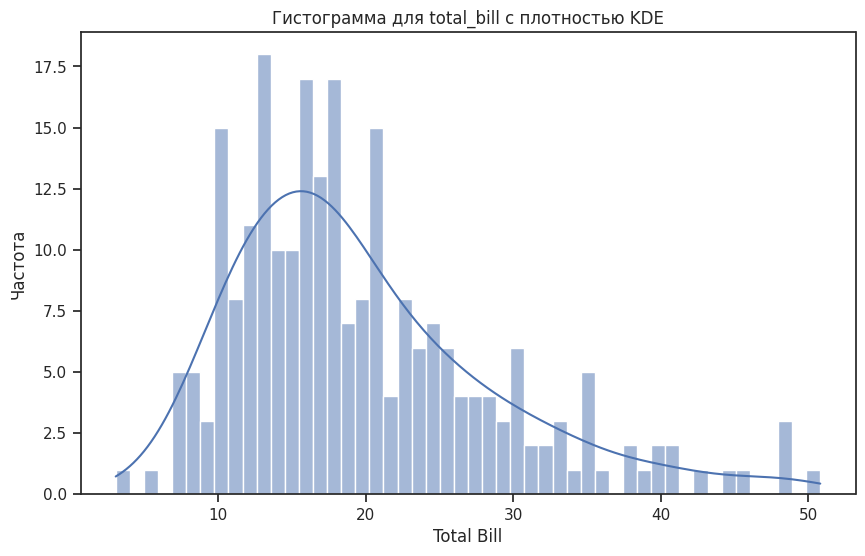

In [54]:
plt.figure(figsize=(10,6))
#kde=True - добавляю прямую плотности
sns.histplot(tips['total_bill'], bins=50, kde=True)
plt.title('Гистограмма для total_bill с плотностью KDE')
plt.xlabel('Total Bill')
plt.ylabel('Частота')
plt.show()

14. **Создать временной ряд**: Создайте временной ряд с искусственными данными и постройте линейный график.



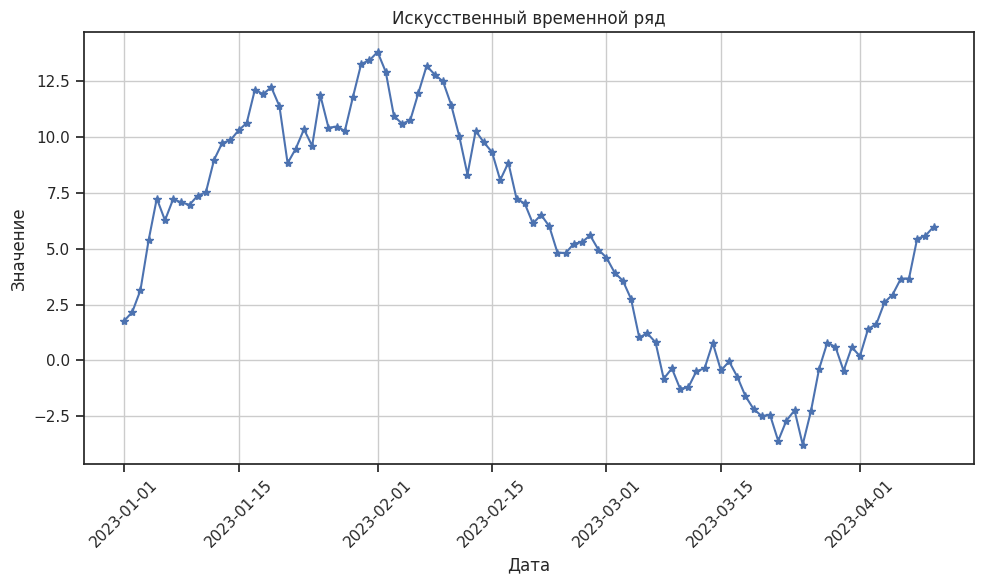

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# начальная даты
start_date = '2023-01-01'
# Создание диапазона дат
date_range = pd.date_range(start=start_date, periods=100, freq='D')
# Генерация искусственных данных 100 шт с 1 января 23 года
np.random.seed(0)  # Для воспроизводимости
data = np.random.randn(100).cumsum()  # Кумулятивная сумма случайных значений
# Создание DataFrame
time_series = pd.DataFrame(data, index=date_range, columns=['Value'])
# Построение линейного графика
plt.figure(figsize=(10, 6))
plt.plot(time_series.index, time_series['Value'], marker='*', linestyle='-')
plt.title('Искусственный временной ряд')
plt.xlabel('Дата')
plt.ylabel('Значение')
#клеточки
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

15. **Добавить скользящее среднее**: Добавьте скользящее среднее к временным данным и постройте график.



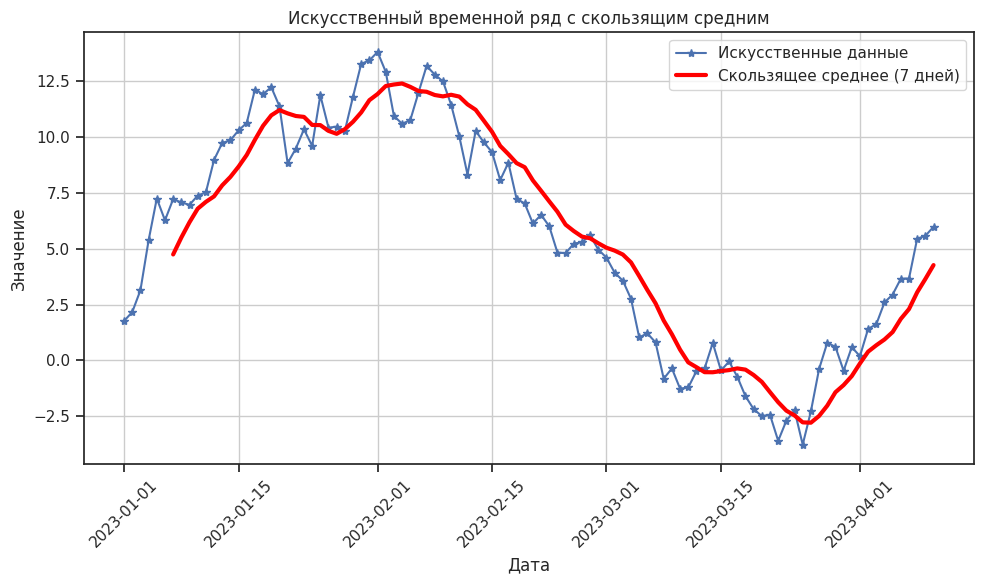

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# начальная дата
start_date = '2023-01-01'
# Создание диапазона дат
date_range = pd.date_range(start=start_date, periods=100, freq='D')
# Генерация искусственных данных 100 шт с 1 января 23 года
np.random.seed(0)  # Для воспроизводимости
data = np.random.randn(100).cumsum()  # Кумулятивная сумма случайных значений
# Создание DataFrame
time_series = pd.DataFrame(data, index=date_range, columns=['Value'])

# Расчет скользящего среднего ( в 7 дней)
time_series['SMA_7'] = time_series['Value'].rolling(window=7).mean()

# Построение линейного графика
plt.figure(figsize=(10, 6))
plt.plot(time_series.index, time_series['Value'], marker='*', linestyle='-', label='Искусственные данные')
#  добавляем график
plt.plot(time_series.index, time_series['SMA_7'], color='Red', linewidth=3, label='Скользящее среднее (7 дней)')
plt.title('Искусственный временной ряд с скользящим средним')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.grid()
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


16. **Агрегировать данные**: Агрегируйте данные по неделям и постройте линейный график.



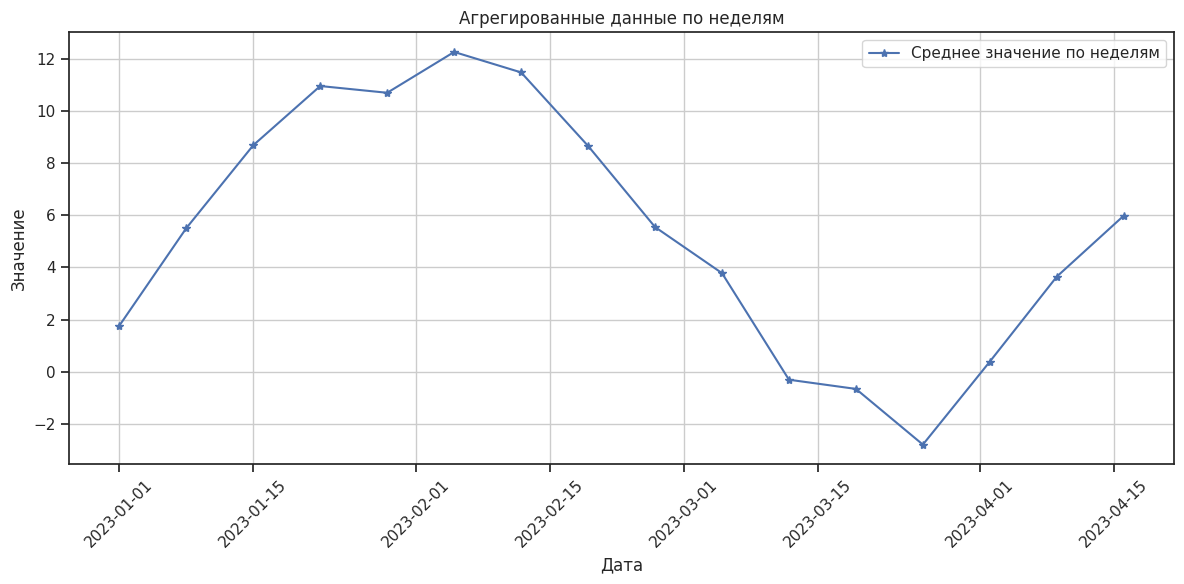

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# начальная дата
start_date = '2023-01-01'
# Создание диапазона дат
date_range = pd.date_range(start=start_date, periods=100, freq='D')
# Генерация искусственных данных 100 шт с 1 января 23 года
np.random.seed(0)  # Для воспроизводимости
data = np.random.randn(100).cumsum()  # Кумулятивная сумма случайных значений
# Создание DataFrame
time_series = pd.DataFrame(data, index=date_range, columns=['Value'])

# Агрегация данных по неделям, используя среднее значение
weekly_data = time_series.resample('W').mean()

# Построение линейного графика
plt.figure(figsize=(12, 6))
plt.plot(weekly_data.index, weekly_data['Value'], marker='*', linestyle='-', label='Среднее значение по неделям')
plt.title('Агрегированные данные по неделям')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.grid()
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

17. **Построить тепловую карту для временных данных**: Создайте тепловую карту для временных данных, отображая температуру по дням и месяцам.



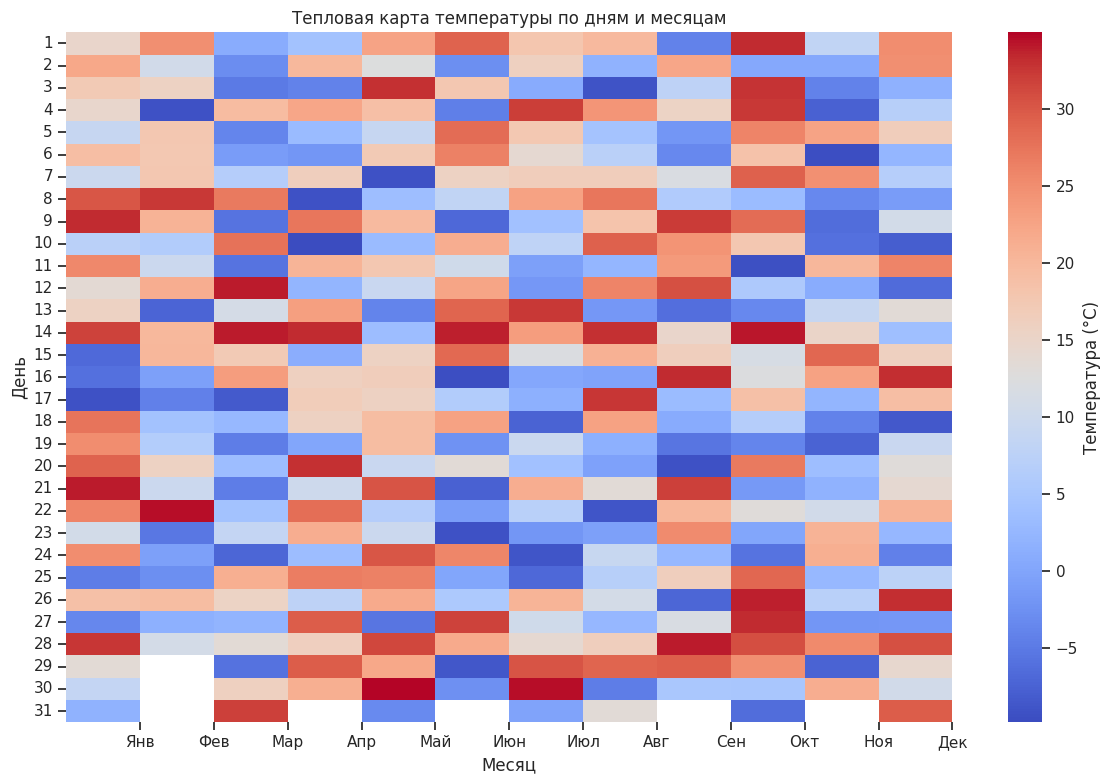

In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Установка начальной даты
start_date = '2023-01-01'
# Создание диапазона дат в длину 1 год
date_range = pd.date_range(start=start_date, periods=365, freq='D')
# Генерация искусственных данных о температуре (значения от -10 до 35)
np.random.seed(0)  # Для воспроизводимости
temperature_data = np.random.uniform(low=-10, high=35, size=(365,))
# Создание DataFrame
temperature_df = pd.DataFrame(temperature_data, index=date_range, columns=['Temperature'])
# Добавление столбцов для месяца и дня
temperature_df['Month'] = temperature_df.index.month
temperature_df['Day'] = temperature_df.index.day
# Создание сводной таблицы для тепловой карты
heatmap_data = temperature_df.pivot_table(values='Temperature', index='Day', columns='Month')
# Построение тепловой карты
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=False, cbar_kws={'label': 'Температура (°C)'})
plt.title('Тепловая карта температуры по дням и месяцам')
plt.xlabel('Месяц')
plt.ylabel('День')
plt.xticks(ticks=np.arange(1, 13), labels=['Янв', 'Фев', 'Мар', 'Апр', 'Май', 'Июн', 'Июл', 'Авг', 'Сен', 'Окт', 'Ноя', 'Дек'])
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

18. **Добавить подписи на графиках**: Добавьте текстовые подписи к точкам на scatterplot.
+ 19. **Настроить легенду**: Измените заголовок и позицию легенды на графике scatterplot.




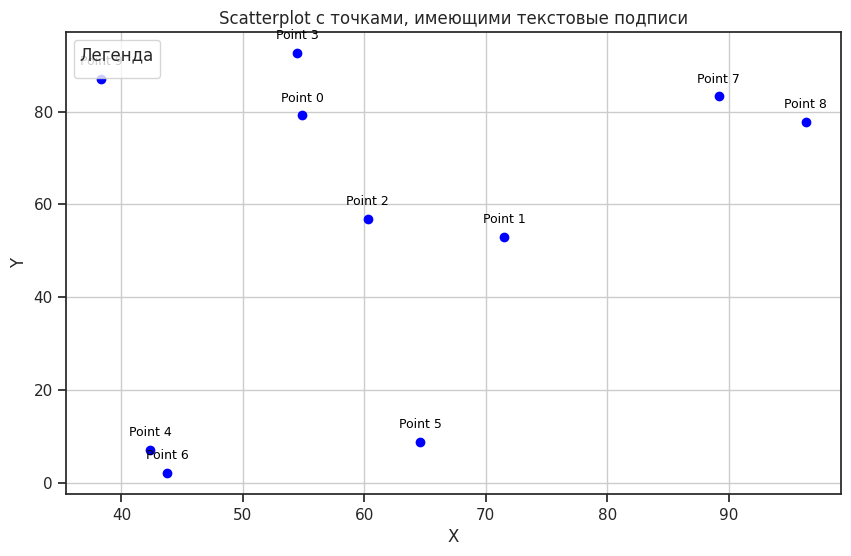

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)
x = np.random.rand(10) * 100  # Случайные значения по оси X
y = np.random.rand(10) * 100  # Случайные значения по оси Y
labels = [f'Point {i}' for i in range(10)]  # Подписи для каждой точки

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue')

# Добавление подписей к точкам
for i in range(len(x)):
    plt.annotate(labels[i], (x[i], y[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=9, color='black')
# Настройка легенды
plt.legend(title='Легенда', loc='upper left')  # Измените заголовок и позицию легенды

plt.title('Scatterplot с точками, имеющими текстовые подписи')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

19. **Настроить легенду**: Измените заголовок и позицию легенды на графике scatterplot.



20. **Изменить размеры графиков**: Измените размер графика для boxplot.

21. **Создать комбинированный график**: Постройте комбинированный график с гистограммой и scatterplot.

22. **Анализировать сезонность**: Выявите сезонные колебания в временных рядах и визуализируйте их.

23. **Построить многосерийный график**: Постройте график с несколькими временными рядами для разных городов.

24. **Работать с палитрами**: Измените цветовую палитру на `coolwarm` и постройте boxplot.

25. **Добавить дополнительные элементы**: Включите горизонтальные и вертикальные линии на график.

26. **Сравнить два набора данных**: Сравните два набора данных с помощью boxplot.

27. **Анализировать категориальные данные**: Используйте countplot для анализа частоты заказов по дням недели.

28. **Построить регрессионный анализ**: Создайте регрессионный график для анализа зависимости между переменными.

29. **Настроить метки осей**: Измените метки осей и заголовок на графике.

30. **Сохранить график**: Сохраните построенный график в файл формата PNG.

31. **Построить график с несколькими осями**: Создайте график с двумя осями Y, чтобы сравнить две разные переменные.

32. **Использовать стиль Seaborn**: Примените стиль `white` для графиков и постройте любой тип графика.

33. **Создать график с ошибками**: Постройте график с отображением доверительных интервалов для средних значений.

34. **Анализировать распределение**: Постройте график распределения для переменной `tip` с использованием `distplot`.

35. **Сравнить группы**: Создайте barplot для сравнения средней суммы счета по разным группам (например, курящие и некурящие).

36. **Добавить аннотации**: Добавьте аннотации к важным точкам на графике scatterplot.

37. **Изменить цветовую палитру**: Попробуйте различные цветовые палитры, такие как `cubehelix`, на графике.

38. **Проанализировать данные по времени**: Постройте график, показывающий изменение средней суммы счета по месяцам.

39. **Построить график с несколькими переменными**: Используйте `pairplot` для анализа взаимосвязей между несколькими переменными.

40. **Сохранить график в разных форматах**: Сохраните график в формате JPG и PDF.
